In [3]:
import pandas as pd

df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Etykieta klas', 'Alkohol', 'Kwas jabłkowy', 'Popiół', 
'Zasadowość popiołu', 'Magnez', 'Całk. zaw. fenoli', 
'Flawonoidy', 'Fenole nieflawonoidowe', 'Proantocyjaniny', 
'Intensywność koloru', 'Odcień', 'Transmitancja 280/315 nm', 'Prolina']
df_wine.head()

,Etykieta klas,Alkohol,Kwas jabłkowy,Popiół,Zasadowość popiołu,Magnez,Całk. zaw. fenoli,Flawonoidy,Fenole nieflawonoidowe,Proantocyjaniny,Intensywność koloru,Odcień,Transmitancja 280/315 nm,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nWartości własne \n%s' % eigen_vals)


Wartości własne 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


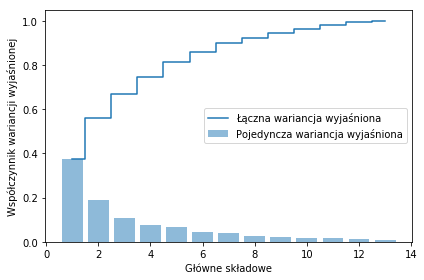

In [14]:
tot = sum(eigen_vals)
var_exp=[(i/tot) for i in
            sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Pojedyncza wariancja wyjaśniona')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Łączna wariancja wyjaśniona')
plt.ylabel('Współczynnik wariancji wyjaśnionej')
plt.xlabel('Główne składowe')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('./rysunki/05_02.png', dpi=300)
plt.show()

In [24]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [26]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [29]:
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

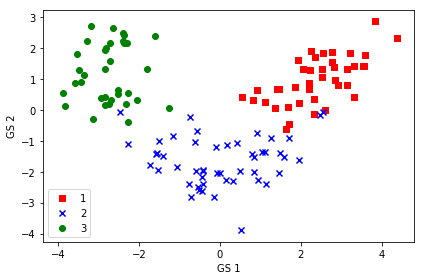

In [30]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('GS 1')
plt.ylabel('GS 2')
plt.legend(loc='lower left')
plt.tight_layout()
#plt.savefig('./rysunki/05_03.png', dpi=300)
plt.show()

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

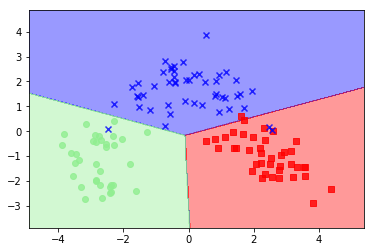

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)

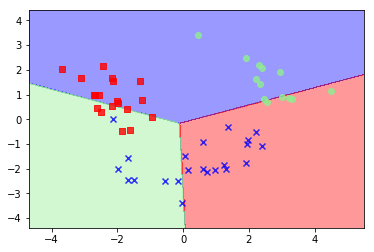

In [47]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)